# Convergent Cross Mapping / Sugihara Causality
<br>Prince Javier
<br>PhD in Data Science
<br>Asian Institute of Management

## References
**Main references**
* https://science.sciencemag.org/content/338/6106/496
* https://science.sciencemag.org/content/suppl/2012/09/19/science.1227079.DC1

**Supplementary materials**
* https://www.pnas.org/content/pnas/suppl/2016/10/26/1607747113.DCSupplemental/pnas.1607747113.sapp.pdf
* https://cran.microsoft.com/snapshot/2018-07-06/web/packages/rEDM/vignettes/rEDM-algorithms.pdf
* https://www.zora.uzh.ch/id/eprint/129395/1/Simplex_projection_walkthrough.pdf
* https://arxiv.org/pdf/1603.01155.pdf
* https://web.iitd.ac.in/~sumeet/Sahil_Parul_btp_thesis.pdf
* http://www.scholarpedia.org/article/Attractor_reconstruction

## Let's Play a Game
I'll show yoy charts of trajectories of two variables. Your goal is to guess if there's causation (one causes the other) between the variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy.interpolate import make_interp_spline
from tqdm import tqdm

/Users/prince.javier/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [307]:
def make_plots(df, dt_name, val1_name, val2_name):
    # smoothen
    date_smooth = np.linspace(df[dt_name].min(), df[dt_name].max(), 100) 
    spl = make_interp_spline(df[dt_name], df[val1_name], k=2)
    val1 = spl(date_smooth)
    spl = make_interp_spline(df[dt_name], df[val2_name], k=2)
    val2 = spl(date_smooth)    
    correl = np.round(np.corrcoef(df[val1_name], df[val2_name])[0][1], 2) # correlation coefficient
    
    # plot
    f, ax = plt.subplots(figsize=(12, 4))
    ax.plot(date_smooth, val1, )
    ax = df.plot(x=dt_name, y=val1_name, marker='o', c='b', linestyle='', legend=False, ax=ax)
    ax2 = ax.twinx()
    ax2.plot(date_smooth, val2, c='r')
    df.plot(x=dt_name, y=val2_name, marker='o', c='r', linestyle='', legend=False, ax=ax2)
    ax.figure.legend()        
    plt.title(f"{val1_name} and {val2_name}, correlation coefficient: {correl}", size=16)
    plt.tight_layout()
    plt.show()

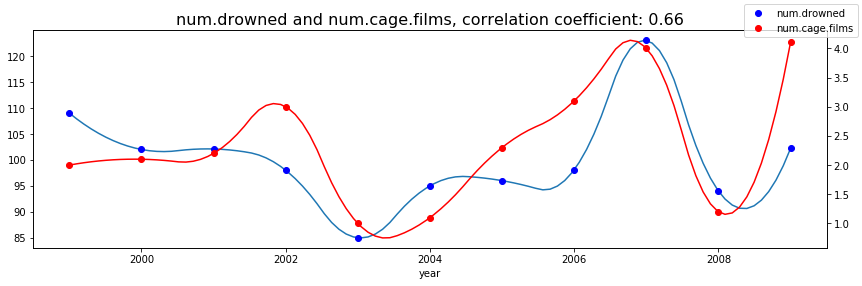

In [308]:
df = pd.read_csv('data/chart2.csv')
df['year'] = range(1999, 2010)
make_plots(df, 'year', 'num.drowned', 'num.cage.films')

## Background

### Why understand causation?

### Correlation is not causation

### Granger's Causality works for special cases

## CCM / Sugihara Causality

### Applicability

### How and why does it work?

<CONCEPTS, illustrations, related concepts, CHARTS here>

#### Takens' Embedding Theorem

### Assumptions and Limitations

## Sample System

We show here a sample nonlinear system. Here, we explicitly defined $X$ to be influenced by $Y$ and vice versa. The effect of $X$ on $Y$ is a factor of $\beta_{y,x}$ and the effect of $Y$ on $X$ is a factor of $\beta_{x,y}$. One way to read $\beta_{y,x}$: "the influence of $x$ on $y$". $r_x$ and $r_y$ are some constants that affect how chaotic the system is. As we increase $r$ say $r > 3.5$ we get more unpredictable ("chaotic") behavior.

$X(t+1)=X(t)[r_x-r_xX_t-\beta_{x,y}Y(t)]$
<br>$Y(t+1)=Y(t)[r_y-r_yY_t-\beta_{y,x}X(t)]$

Some of our questions:
* Can we detect the interaction between these two variables by looking at the correlation between them?
* Can we detect that X influences Y and vice versa via the Granger causality framework? (ADD GRANGER CAUSALITY DISCUSSION)
* Can convergent cross mapping help us find this out?

In [55]:
# TURN THIS INTO AN EXERCISE
# SHOW ANSWERS DURING PRESENTATION
def func_1(A, B, r, beta):
    return A * (r - r * A - beta * B)

In [369]:
# TURN THIS INTO AN EXERCISE
# SHOW ANSWERS DURING PRESENTATION
# params
r_x = 3.8
r_y = 3.5
B_xy = 0.02 # effect on x given y (effect of y on x)
B_yx = 0.1 # effect on y given x (effect of x on y)

X0 = 0.4 # initial val
Y0 = 0.2 # initial val
t = 5000 # time steps

X = [X0]
Y = [Y0]
for i in range(t):
    X_ = func_1(X[-1], Y[-1], r_x, B_xy)
    Y_ = func_1(Y[-1], X[-1], r_y, B_yx)    
    X.append(X_)
    Y.append(Y_)        

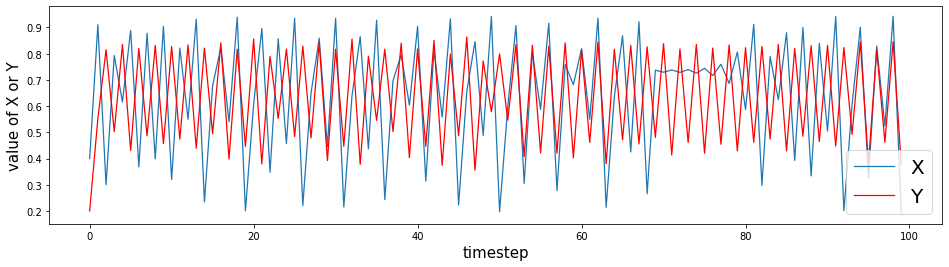

In [370]:
plt.figure(figsize=(16,4))
max_t = 100
plt.plot(X[:max_t], linewidth=1.25, label='X')
plt.plot(Y[:max_t], c='r', linewidth=1.25, label='Y')
plt.xlabel('timestep', size=15)
plt.ylabel('value of X or Y', size=15)
plt.legend(prop={'size': 20})

**Class discussion**
1. Is the system chaotic or random? Say got these data the first time without knowing the equations, which tests can we apply to check if the system is chaotic or random?
* What conclusions about causality can we infer from this plot?

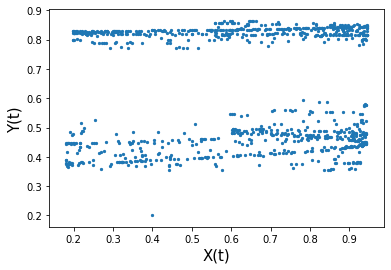

0.005395539983091764

In [319]:
# correlations in the first 1000 time steps
max_t = 1000
x, y = X[:max_t], Y[:max_t]
plt.scatter(x, y, s=5)
plt.xlabel('X(t)', size=15)
plt.ylabel('Y(t)', size=15)
plt.show()
np.corrcoef(x, y)[0][1]

**Class Discussion**

Though we explicitly defined Y to be a function of X (X influences Y), we find no correlation between them in the long term. 
<br>Based on this correlation value, what can we conclude about the relationship between X and Y (e.g. whether or not X influences Y or vice versa)?

In [320]:
# using Granger Causality

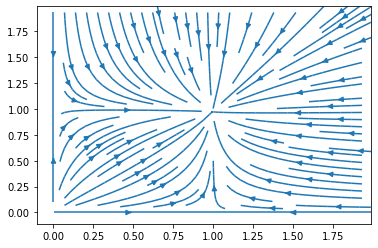

## CCM Algorithm

1. Given two time series $X = \{X(1), X(2), ..., X(L)\}$ and $Y = \{Y(1), Y(2), ..., Y(L)\}$ where $L$ is time series length
* Compute lagged-coordinate vectors $\underline{x}(t) = <X(t), X(t-\tau), X(t-2\tau), ..., X(t-(E-1)\tau)>$ for $t \in [1+(E-1)\tau, L]$ where $E$ is an "embedding" dimension. Search algorithms e.g. grid search can be used to identify what the best $E$ value is. $\tau$ is the lag step.
* Define the "shadow (attractor) manifold" $M_x = \{\underline{x}(t) \text{ for each } t \in [1+(E-1)\tau, L]\}$
* At $t$, locate $\underline{x}(t)$ in $M_x$
* Find the $E+1$ nearest neighbor vectors from selected vector $\underline{x}(t)$. Sugihara, et al. noted that $E+1$ is the minimum number of points needed for an "embedding/simplex" with $E$ dimensions. Intuitively, if you have a 2D matrix, you need 3 points (2 + 1) to "triangulate" a point
* Denote the time indices of the $E+1$ nearest neighbors of $\underline{x}(t)$ by $t_1, ..., t_{E+1}$. These indices will be used to identify the corresponding points in $Y$.
* Define the model that predicts $Y$ given $M_x$ as $\hat{Y} | M_x = \Sigma{w_iY(t_i)}$ where $i = 1 ... E+1$ where $w_i$ is the weight multiplied by the corresponding $Y(t_i)$
    1. $w_i = u_i / \Sigma{u_j}$ where $j = 1...E+1$
    * $u_i = exp[-d(\underline{x}(t), \underline{x}(t_i))/d(\underline{x}(t), \underline{x}(t_1))]$ where $d(\underline{x}(s), \underline{x}(t))$ is a Euclidean distance. Note that we divide by $d(x(t), x(t_1))$ to "scale" the distances as a multiples of the distance to the closest point. Though not sure why this is necessary.
* If $X$ and $Y$ are dynamically "coupled" i.e. one influences the other, a clump of points in $M_x$ should correspond to a clump of points in $M_y$. And as $L$ increases, we get a denser cluster of $E+1$ points from $M_x$ that correspond to a denser cluster of points in $M_y$. Given this, $\hat{Y} | M_x$ intuitively should converge to $Y$ as $L$ increases, e.g. we get more data/samples. Hence, we can test for convergence of the nearest neighbors to test for correspondence between states on $M_x$ and $M_y$.
* We then plot the correlation coefficients between $Y$ and $\hat{Y} | M_x$. If there is significant correlation, this means we have enough information from $Y$ that is stored in $X$. We say that $Y$ influences $X$. It sounds counter intuitive but another way to think about it is: if $Y$ influences $X$ then information from $Y$ gets stored in $X$. We can thus use $X$ to predict $Y$. Same goes for $X$ influencing $Y$.

In [365]:
def shadow_manifold(X, tau, E, L):
    """
    Args
        X: some time series vector
        tau: lag step
        E: shadow manifold embedding dimension
        L: max time step to consider - 1 (starts from 0)
    Returns
        {t:[t, t-tau, t-2*tau ... t-(E-1)*tau]} = Shadow attractor manifold, dictionary of vectors
    """
    X = X[:L] # make sure we cut at L
    M = {t:[] for t in range((E-1) * tau, L)} # shadow manifold
    for t in range((E-1) * tau, L):
        x_lag = [] # lagged values
        for t2 in range(0, E-1 + 1): # get lags, we add 1 to E-1 because we want to include E
            x_lag.append(X[t-t2*tau])            
        M[t] = x_lag
    return M

In [440]:
# get pairwise distances between vectors in X
def get_distances(Mx):
    """
    Args
        Mx: The shadow manifold from X
    Returns
        t_steps: timesteps
        dists: n x n matrix showing distances of each vector at t_step (rows) from other vectors (columns)
    """

    # we extract the time indices and vectors from the manifold Mx
    # we just want to be safe and convert the dictionary to a tuple (time, vector)
    # to preserve the time inds when we separate them
    t_vec = [(k, v) for k,v in Mx.items()]
    t_steps = np.array([i[0] for i in t_vec])
    vecs = np.array([i[1] for i in t_vec])
    dists = distance.cdist(vecs, vecs)    
    return t_steps, dists

In [442]:
def get_nearest_distances(t, t_steps, dists, E):
    """
    Args:
        t: timestep of vector whose nearest neighbors we want to compute
        t_teps: time steps of all vectors in Mx, output of get_distances()
        dists: distance matrix showing distance of each vector (row) from other vectors (columns). output of get_distances()
        E: embedding dimension of shadow manifold Mx 
    Returns:
        nearest_timesteps: array of timesteps of E+1 vectors that are nearest to vector at time t
        nearest_distances: array of distances corresponding to vectors closest to vector at time t
    """
    t_ind = np.where(t_steps == t) # get the index of time t
    dist_t = dists[t_ind].squeeze() # distances from vector at time t (this is one row)
    
    # get top closest vectors
    nearest_inds = np.argsort(dist_t)[1:E+1 + 1] # get indices sorted, we exclude 0 which is distance from itself
    nearest_timesteps = t_steps[nearest_inds] # index column-wise, t_steps are same column and row-wise 
    nearest_distances = dist_t[nearest_inds]  
    
    return nearest_timesteps, nearest_distances


In [443]:
def predict(Y, t, E, t_steps, dists):
    """
    Args
        Y: The time series we are trying to predict
        t: timestep of the point to compute the nearest neighbors on
        E: The embedding dimension
        t_steps: time steps from Manifold Mx, computed from get_distances
        dists: distance per vector / point from other points in Manifold Mx
    Returns
        Y_true: the true value of Y at time t
        Y_hat: the predicted value of Y at time t using Mx
    """

    t_ind = np.where(t_steps == t) # get the index of time t
    dist_t = dists[t_ind].squeeze() # distances from vector at time t (this is one row)    
    nearest_timesteps, nearest_distances = get_nearest_distances(t, t_steps, dists, E)    
    
    # get weights
    u = np.exp(-nearest_distances/nearest_distances[0]) # we divide by the closest distance to scale
    w = u / np.sum(u)
    
    # get prediction of Y
    Y_true = Y[t] # get corresponding true Y
    Y_cor = np.array(Y)[nearest_timesteps] # get corresponding Y to cluster in Mx
    Y_hat = (w * Y_cor).sum() # get Y_hat
    
    return Y_true, Y_hat
    
    

In [444]:
# Computing "Causality" (Correlation between True and Predictions)

class ccm:
    def __init__(self, X, Y):
        '''
        X: timeseries for variable X that could cause Y
        Y: timeseries for variable Y that could be caused by X
        We're checking for X -> Y
        '''
        self.X = X
        self.Y = Y

    def causality(self, tau, E, L):
        '''
        Args:
            tau - lag time step value
            E - shadow manifold embedding dimension
            L - length of time to consider
        Returns:
            correl: how much self.X causes self.Y. correlation between predicted Y and true Y
        '''
        My = shadow_manifold(self.Y, tau, E, L) # shadow manifold for Y (we want to know if info from X is in Y)
        t_steps, dists = get_distances(My) # for distances between points in manifold

        # run over all timesteps in M
        # X causes Y, we can predict X using My
        # X puts some info into Y that we can use to reverse engineer X from Y        
        X_true_list = []
        X_hat_list = []

        for t in list(My.keys()): # for each time step in My
            X_true, X_hat = predict(self.X, t, E, t_steps, dists) # predict X from My
            X_true_list.append(X_true)
            X_hat_list.append(X_hat)    

        x, y = X_true_list, X_hat_list
        correl = np.corrcoef(x, y)[0][1]
        return correl    

## CCM In Action

### Can CCM predict causality in our test system?
Remember our test system is:

$X(t+1)=X(t)[r_x-r_xX_t-\beta_{x,y}Y(t)]$
<br>$Y(t+1)=Y(t)[r_y-r_yY_t-\beta_{y,x}X(t)]$

In [445]:
# Initialize test dataset
# params
r_x = 3.8
r_y = 3.5
B_xy = 0.02 # effect on x given y (effect of y on x)
B_yx = 0.1 # effect on y given x (effect of x on y)

X0 = 0.4 # initial val
Y0 = 0.2 # initial val
t = 5000 # time steps

X = [X0]
Y = [Y0]
for i in range(t):
    X_ = func_1(X[-1], Y[-1], r_x, B_xy)
    Y_ = func_1(Y[-1], X[-1], r_y, B_yx)    
    X.append(X_)
    Y.append(Y_)        

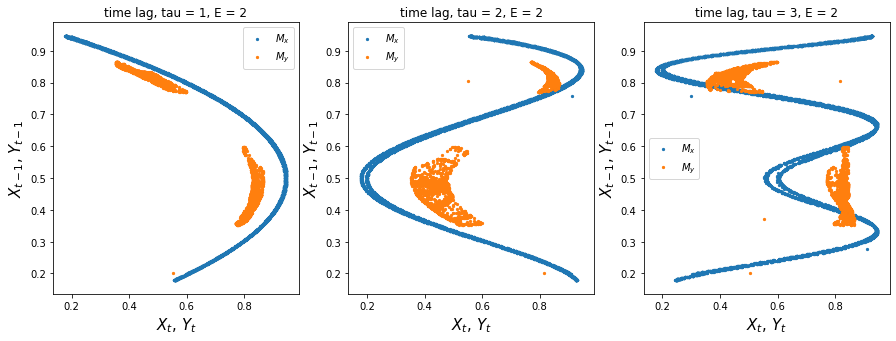

In [446]:
# Visualize simple shadow manifolds Mx and My for different tau

f, axs = plt.subplots(1, 3, figsize=(15, 5))
tau_range = np.arange(1, 5, 1)

for tau, ax in zip(tau_range, axs):
    X_lag, Y_lag = [], []
    for t in range(1, len(X)):
        X_lag.append(X[t-tau])
        Y_lag.append(Y[t-tau])    
    X_t, Y_t = X[1:], Y[1:] # remove first value

    ax.scatter(X_t, X_lag, s=5, label='$M_x$')
    ax.scatter(Y_t, Y_lag, s=5, label='$M_y$')
    ax.set_title(f'time lag, tau = {tau}, E = 2')
    ax.legend()
    
    ax.set_xlabel('$X_t$, $Y_t$', size=15)
    ax.set_ylabel('$X_{t-1}$, $Y_{t-1}$', size=15)    

plt.show()

In [459]:
tau=1
E=2
Mx = shadow_manifold(X, tau, E, L)
t_steps, dists = get_distances(Mx) # for distances between points in manifold
t=1
get_nearest_distances(t, t_steps, dists, E)

(array([1264, 2686, 1544]), array([0.00158961, 0.00164919, 0.00170673]))

In [448]:
L_range = range(20, 3000, 100) # L values to test
tau = 1
E = 2

ccm_XY = ccm(X, Y) # define new ccm object # Testing for X -> Y
ccm_YX = ccm(Y, X) # define new ccm object # Testing for Y -> X
Xhat_My, Yhat_Mx = [], [] # correlation list
for L in tqdm(L_range): 
    Xhat_My.append(ccm_XY.causality(tau, E, L)) 
    Yhat_Mx.append(ccm_YX.causality(tau, E, L))    



  0%|          | 0/30 [00:00<?, ?it/s]

 10%|█         | 3/30 [00:00<00:01, 15.88it/s]

 13%|█▎        | 4/30 [00:00<00:02, 11.84it/s]

 17%|█▋        | 5/30 [00:00<00:02,  8.91it/s]

 20%|██        | 6/30 [00:00<00:03,  6.60it/s]

 23%|██▎       | 7/30 [00:01<00:04,  5.23it/s]

 27%|██▋       | 8/30 [00:01<00:05,  4.30it/s]

 30%|███       | 9/30 [00:01<00:05,  3.60it/s]

 33%|███▎      | 10/30 [00:02<00:06,  3.07it/s]

 37%|███▋      | 11/30 [00:02<00:07,  2.59it/s]

 40%|████      | 12/30 [00:03<00:08,  2.24it/s]

 43%|████▎     | 13/30 [00:03<00:08,  1.93it/s]

 47%|████▋     | 14/30 [00:04<00:09,  1.68it/s]

 50%|█████     | 15/30 [00:05<00:10,  1.47it/s]

 53%|█████▎    | 16/30 [00:06<00:10,  1.31it/s]

 57%|█████▋    | 17/30 [00:07<00:10,  1.22it/s]

 60%|██████    | 18/30 [00:08<00:10,  1.15it/s]

 63%|██████▎   | 19/30 [00:09<00:10,  1.08it/s]

 67%|██████▋   | 20/30 [00:10<00:09,  1.01it/s]

 70%|███████   | 21/30 [00:11<00:09,  1.05s/it]

 73%|███████▎  | 22/30 [00:13<00:0

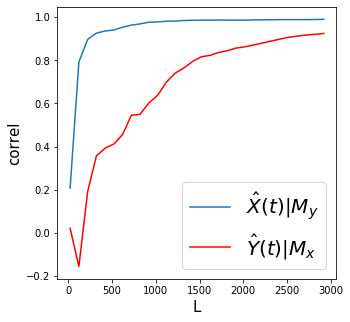

In [450]:
# plot
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, c='r', label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=15)
plt.ylabel('correl', size=15)
plt.legend(prop={'size': 20})

**Class Discussion**
1. Assuming the CCM methodology is correct, what can we conclude from this plot about the interactions between $X$ and $Y$?
* What do the trends approach as we look at longer time periods $L$?
* Which variable has more influence on the other?

### Checking Convergence for Various Betas

In [438]:
# Checking convergence for various betas
# params
X0 = 0.4 # initial val
Y0 = 0.4 # initial val
t = 400 # time steps for the dataset
L = 400 # time steps for computing CCM
E = 2 # embedding dimensions

range_ = list(np.arange(0, 0.4, 0.01)) # B ranges
correl_diffs = np.zeros(shape=(len(range_), len(range_))) # correlation list
np.random.seed(42)

for ind_B_xy in tqdm(range(len(range_))): # effect on x given y (effect of y on x)
    for ind_B_yx in range(len(range_)): # effect on y given x (effect of x on y)
        
        r_x = np.random.choice(np.arange(3.6, 4.1, 0.1)) # paper implies random sampling
        r_y = np.random.choice(np.arange(3.6, 4.1, 0.1)) # paper implies random sampling

        B_xy = range_[ind_B_xy]
        B_yx = range_[ind_B_yx]
        
        # initialize dataset
        X, Y = [X0], [Y0]
        for i in range(t):
            X_ = func_1(X[-1], Y[-1], r_x, B_xy)
            Y_ = func_1(Y[-1], X[-1], r_y, B_yx)    
            X.append(X_)
            Y.append(Y_)
            
        # Testing for X -> Y
        ccm_XY = ccm(X, Y) # define new ccm object
        correl = ccm_XY.causality(tau, E, L)
        correl_xy = ccm_XY.causality(tau, E, L)            

        # Testing for Y -> X
        ccm_YX = ccm(Y, X) # define new ccm object
        correl = ccm_YX.causality(tau, E, L)
        correls = [] # correlation list
        correl_yx = ccm_YX.causality(tau, E, L)
        
        # get diffs 
        correl_diffs[ind_B_yx][ind_B_xy] = correl_yx - correl_xy # (y -> x) - (x-> y)



  0%|          | 0/40 [00:00<?, ?it/s]/Users/prince.javier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/prince.javier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/prince.javier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


  2%|▎         | 1/40 [00:04<03:02,  4.67s/it]

  5%|▌         | 2/40 [00:09<02:53,  4.57s/it]

  8%|▊         | 3/40 [00:13<02:51,  4.63s/it]

 10%|█         | 4/40 [00:18<02:43,  4.55s/it]/Users/prince.javier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


 12%|█▎        | 5/40 [00:22<02:37,  4.49s/it]

 15%|█▌        | 6/40 [00:26<02:30,  4.44s/it]

 18%|█

/Users/prince.javier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


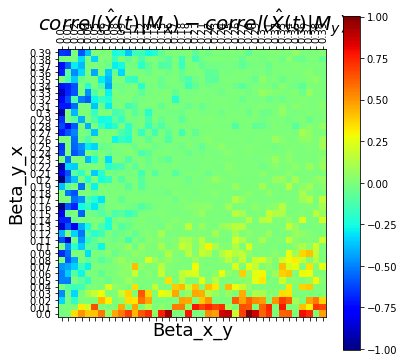

In [439]:
plt.figure(figsize=(6, 6))
plt.matshow(np.nan_to_num(correl_diffs), origin='lower', cmap='jet', fignum=1)
plt.xlabel('Beta_x_y', size=18)
plt.ylabel('Beta_y_x', size=18)
plt.title('$correl(\hat{Y}(t)|M_x) - correl(\hat{X}(t)|M_y$)', size=20)
plt.xticks(range(len(range_)), np.round(range_, 2), rotation=90)
plt.yticks(range(len(range_)), np.round(range_, 2))
plt.colorbar()
plt.tight_layout()
plt.show()

## Application on Real World Systems

### Nicolas Cage Films and Number of Drowned Victims in the US

In [ ]:
df = pd.read_csv('data/chart2.csv')
df.head()

In [ ]:
Y = df['num.cage.films'].values
X = df['num.drowned'].values

tau = 1
E = 2
L = len(X)

M = shadow_manifold(Y, tau, E, L) # shadow manifold
t_steps, dists = get_distances(M) # for distances

# run over all timesteps in M
X_true_list = []
X_hat_list = []

for t in list(M.keys()):
    X_true, X_hat = predict(X, t, E, t_steps, dists)
    X_true_list.append(X_true)
    X_hat_list.append(X_hat)    

x, y = X_true_list, X_hat_list
correl = np.corrcoef(x, y)[0][1]
correl

### Paramecium and Didinium Interactions

### Sardine-Anchovy Interactions

### Non-ecological (CO2 emissions and global temperature)

## Appendix

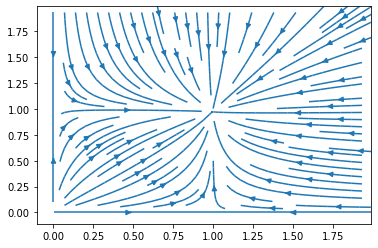

In [412]:
from pylab import *

r_x = 3.8
r_y = 3.5
B_xy = 0.02 # effect on x given y (effect of y on x)
B_yx = 0.1 # effect on y given x (effect of x on y)

xvals, yvals = meshgrid(np.arange(0., 2, 0.01), np.arange(0, 2, 0.01))
Xs = func_1(xvals, yvals, r_x, B_xy)
Ys = func_1(yvals, xvals, r_y, B_yx)

streamplot(xvals, yvals, Xs, Ys)